In [1]:
# import libraries and modules

import torch

from setup import *

from rot_matrix import *

from rot_matrix_analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


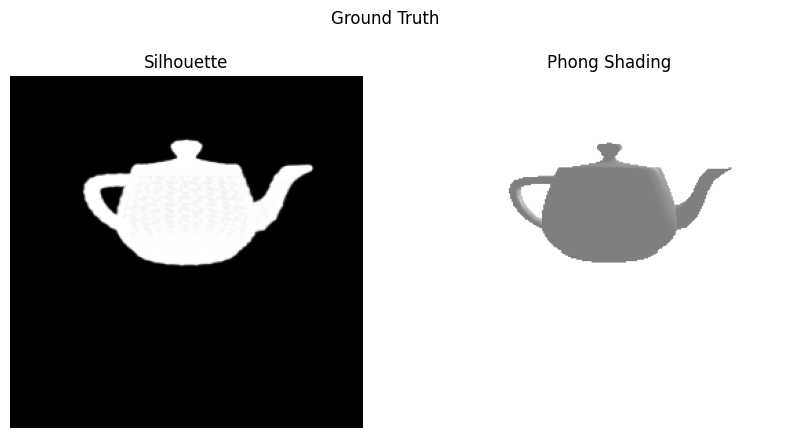

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

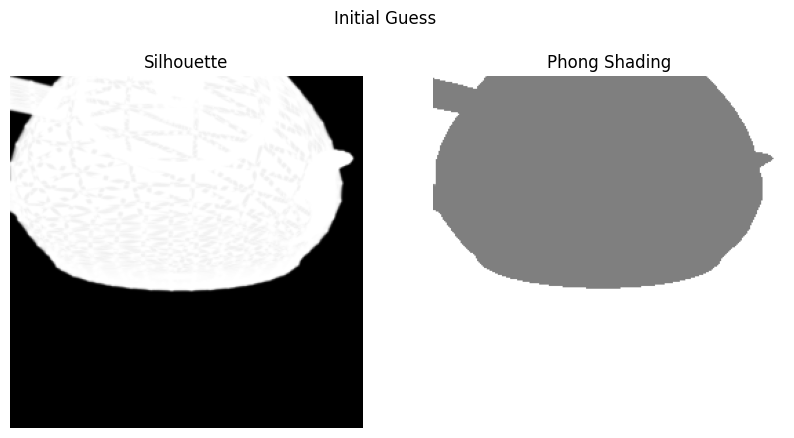

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)
plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

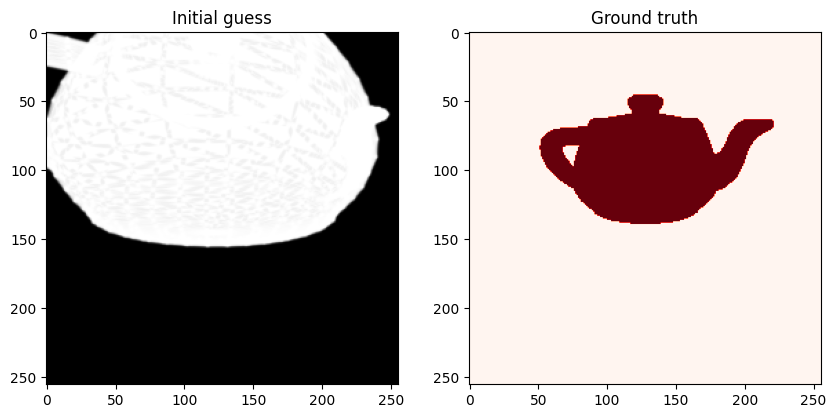

  0%|          | 0/15 [00:13<?, ?it/s]

iteration: 0, loss: 22798.408203125


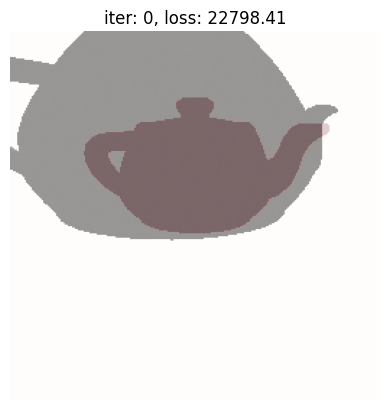

 13%|█▎        | 2/15 [00:27<02:56, 13.59s/it]

iteration: 1, loss: 16674.4453125


 20%|██        | 3/15 [00:40<02:38, 13.18s/it]

iteration: 2, loss: 13101.84375


 27%|██▋       | 4/15 [00:51<02:19, 12.70s/it]

iteration: 3, loss: 9448.138671875


 33%|███▎      | 5/15 [01:03<02:02, 12.21s/it]

iteration: 4, loss: 5763.08251953125


 40%|████      | 6/15 [01:13<01:43, 11.45s/it]

iteration: 5, loss: 3506.834716796875


 47%|████▋     | 7/15 [01:22<01:26, 10.78s/it]

iteration: 6, loss: 3164.64697265625


 53%|█████▎    | 8/15 [01:31<01:10, 10.14s/it]

iteration: 7, loss: 3345.037841796875


 60%|██████    | 9/15 [01:39<00:57,  9.52s/it]

iteration: 8, loss: 4333.23779296875


 67%|██████▋   | 10/15 [01:47<00:45,  9.06s/it]

iteration: 9, loss: 4597.6015625


 67%|██████▋   | 10/15 [01:55<00:45,  9.06s/it]

iteration: 10, loss: 4393.86767578125


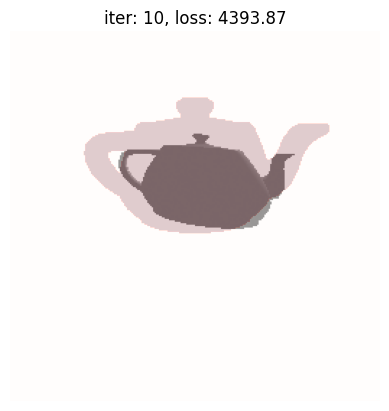

 80%|████████  | 12/15 [02:02<00:24,  8.26s/it]

iteration: 11, loss: 4120.9189453125


 87%|████████▋ | 13/15 [02:09<00:15,  7.86s/it]

iteration: 12, loss: 3999.68115234375


 93%|█████████▎| 14/15 [02:16<00:07,  7.65s/it]

iteration: 13, loss: 4076.319091796875


100%|██████████| 15/15 [02:29<00:00,  9.95s/it]

iteration: 14, loss: 9946.2998046875


In [6]:
losses, parameter_updates, R_min, T_min = train_rotation_matrix_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 15, device)

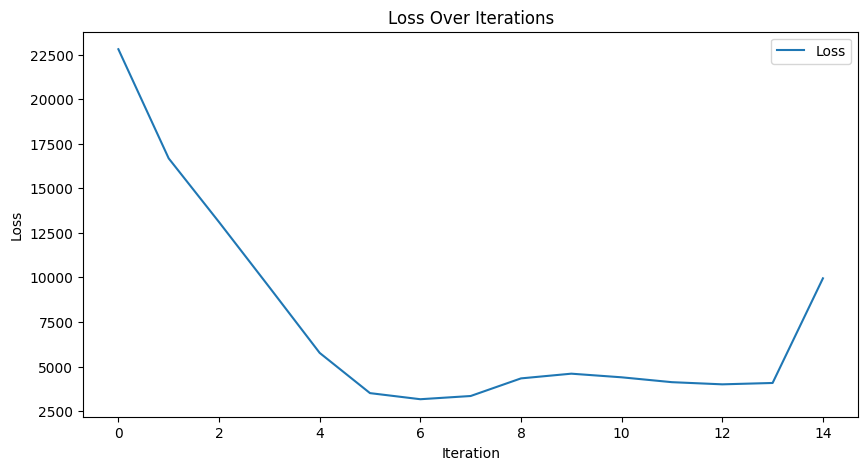

In [10]:
plot_losses(losses)

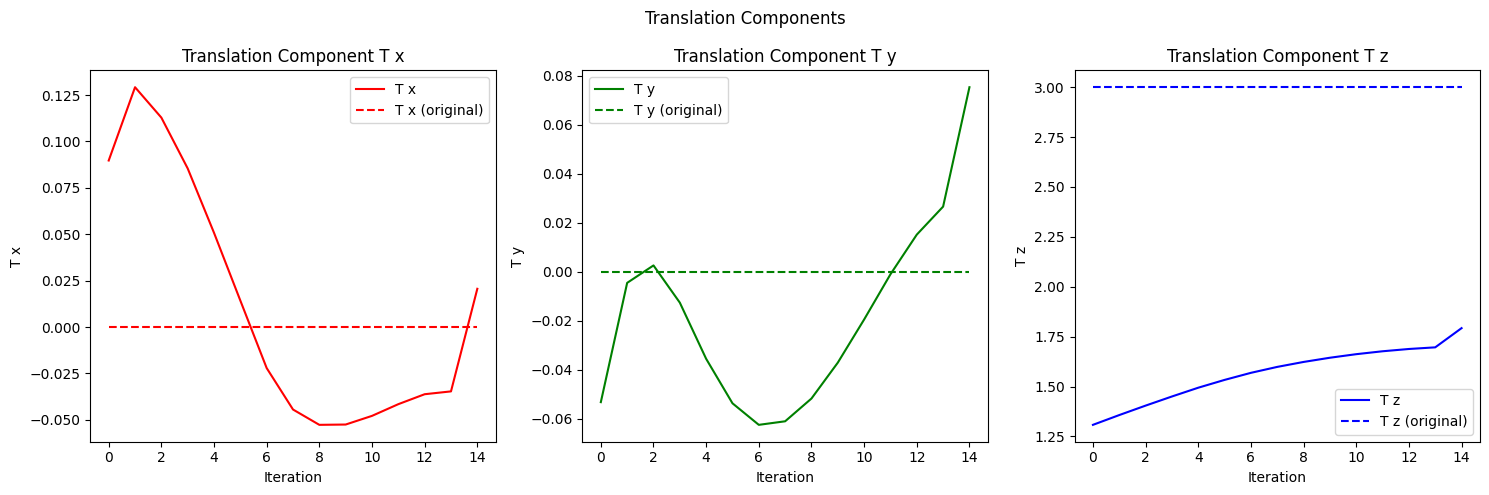

In [11]:
plot_translations(T_gt, parameter_updates)

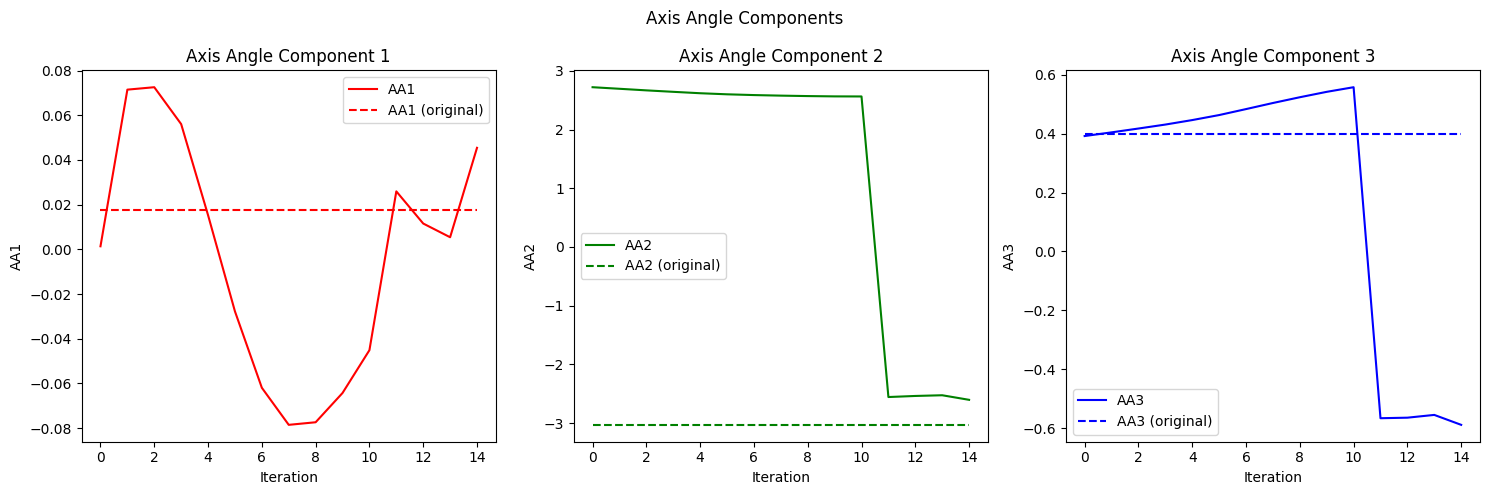

In [12]:
plot_axis_angles(R_gt, parameter_updates)